In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train[0].shape

(28, 28)

In [33]:
x_train=x_train/255
x_test=x_test/255

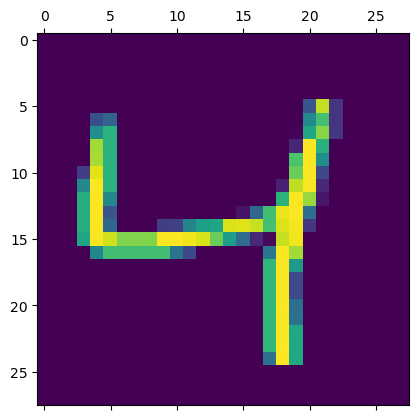

In [34]:
plt.matshow(x_train[2])

In [35]:
y_train[2]

4

In [36]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [37]:
x_train_flattened= x_train.reshape(len(x_train),28*28)
x_test_flattened= x_test.reshape(len(x_test),28*28)

In [38]:
x_test_flattened.shape

(10000, 784)

In [39]:
model =keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4695 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3042 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2835 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2730 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2669 - accuracy: 0.9260


In [40]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2704 - accuracy: 0.9251


[0.27037081122398376, 0.9251000285148621]

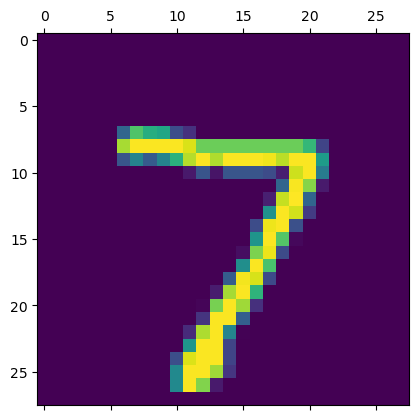

In [41]:
plt.matshow(x_test[0])

In [42]:
y_pred=model.predict(x_test_flattened)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([1.95602477e-02, 4.90865204e-07, 9.01694000e-02, 9.53653812e-01,
       1.42206775e-03, 1.04413144e-01, 9.68625955e-07, 9.99811947e-01,
       9.16832983e-02, 7.33456373e-01], dtype=float32)

In [43]:
np.argmax(y_pred[0])

7

In [44]:
y_pred_labels= [np.argmax(i) for i in y_pred]
y_pred_labels[0:5]

[7, 2, 1, 0, 4]

In [45]:
conf_matrics= tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
conf_matrics

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    4,    6,    2,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,   11,  909,   18,    7,    4,   14,   11,   47,    5],
       [   4,    0,   14,  913,    0,   27,    3,   12,   27,   10],
       [   1,    1,    2,    2,  890,    0,   12,    4,   11,   59],
       [   9,    3,    1,   25,    6,  778,   15,    8,   39,    8],
       [   9,    3,    2,    2,    7,   12,  916,    2,    5,    0],
       [   1,    5,   21,    5,    5,    0,    0,  949,    4,   38],
       [   4,    6,    5,   14,    9,   20,    8,   12,  888,    8],
       [   9,    7,    1,    7,   12,    6,    0,   23,    8,  936]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

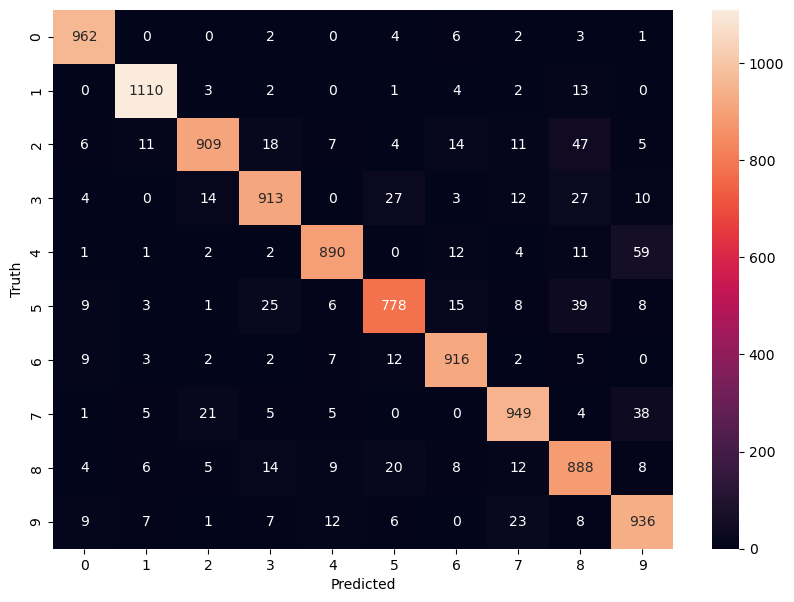

In [48]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrics, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')